## MÁQUINAS DE SOPORTE VECTORIAL

### 1. Importar paquetes y librerías

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.svm import SVR # "Support vector regression"
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing

from sklearn.preprocessing import MinMaxScaler
from statsmodels.graphics.api import abline_plot
from scipy import stats
from statsmodels import graphics

from sklearn.model_selection import train_test_split, cross_val_predict, cross_validate, RepeatedKFold, ShuffleSplit, learning_curve
from sklearn.metrics import r2_score, median_absolute_error,mean_squared_error

from sklearn.model_selection import train_test_split
from statsmodels.tools.eval_measures import rmse
pd.set_option("display.max_rows", 10)

### 2. Importar conjunto de datos

In [2]:
#Importando conjunto de datos

cacao=pd.read_excel("TODAS LAS VARIABLES Y TOTAL.xlsx")

In [3]:
#Eliminar valores faltantes del conjunto de datos

cacao=cacao.dropna()

In [4]:
#Definir variables exógenas

x=cacao[[   "Uso eficiente del agua", "Transpiracion",
            "Diametro tronco (cm)",
            "P", "MO", "Na",
            "Radiacion", "Temperatura", "Humedad", "Lluvias acumuladas (mms)" ]]

In [5]:
#Definir variable endógena

y=cacao["Rendimiento"]

### Histograma variable respuesta

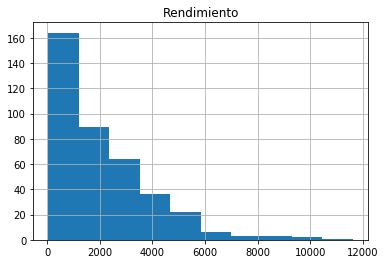

In [6]:
Respuesta=["Rendimiento"]
cacao.hist(Respuesta);

In [7]:
#Dividir el conjunto de datos entre entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2) 
   
# Normalización de los atributos
scaler= preprocessing.StandardScaler().fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

#### Búsqueda de parámetros

In [8]:
#Búsqueda de los mejores parámetros para el modelo SVM con kernel lineal

svr = GridSearchCV(SVR(kernel='linear', gamma=1, epsilon=0.1), cv=5,
                   param_grid = {'C':[1e1, 1e2, 1e3, 1e4],
                             "gamma":np.logspace(-2,2,5),
                             "epsilon": np.logspace(0,1,5)})
svr.fit(X_train_scaled, y_train);

C:\Users\Usuario\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [9]:
print("Los mejores parámetros para el modelo SVM con kernel lineal son:")
svr.best_params_

Los mejores parámetros para el modelo SVM con kernel lineal son:


{'C': 10000.0, 'epsilon': 1.0, 'gamma': 0.01}

### 3. Desarrollo modelo predictivo

#### Predicción modelo SVM

In [12]:
#Modelo SVM con kernel lineal

svr_lin = SVR(kernel='linear', C=1e4, epsilon=1e1, gamma=0.01).fit(X_train_scaled, y_train)
y_lin = svr_lin.predict(X_train_scaled)
print(y_lin)

[1435.86923069 1529.42961745 1467.16876612 1664.3136325  2729.67832225
 2036.01307373 1285.25890862 2046.54712099 2698.58885397 2479.10046796
 2453.24848732 1955.32187331 1591.23448074 1597.44029753 2044.28779719
  304.37442209 1932.59550695  390.16299155 1103.67569761 2045.97037397
 2598.93278203 2331.68134144 2240.79888612 1176.75484937 2622.08141706
 2099.98539918 2663.6379553  1858.33215668  823.5578574   266.246169
 2120.54430338 2525.57658582 1584.73087983 1050.93533652 2971.84133448
 2176.1928116  2215.86493611 1154.98737722 1821.38810209  665.18921399
  788.60695873 2099.56016222  455.49539502 3254.62587826 1912.09625117
 1883.50006135  693.95971005 2482.76270777  549.03071278  800.3983458
  994.01512874  791.18675544  664.69013618 1467.64277494 1114.75459687
 2310.95161419 2584.43804935 2354.17375314 1267.09330301 1931.58561469
 1880.32270693  773.23083747 2853.12113598 2007.41688391  533.14394065
 3060.12318239 1528.012509   2533.60037856 1734.5405466  2602.00739825
 1662.520

In [13]:
print('Coeficientes: \n',svr_lin.coef_)

Coeficientes: 
 [[  496.13852058  2025.99113     1088.16137458 -1242.87705329
    935.8805589    563.95228774  -421.70743422 -2221.50387694
   2181.13712834]]


### 4. Validación

### Hold Out Validation

In [ ]:
R_2=[]
RMSE=[]
MAE=[]
pred=[0]
obs=[0]

for i in range(20):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=12) #Hacer partición de datos en entrenamiento y prueba

    #Escalando particiòn de datos
    scaler= preprocessing.StandardScaler().fit(x_train)
    X_train_scaled=scaler.transform(x_train)
    X_test_scaled=scaler.transform(x_test)
    
    # Ajuste de los modelos
    svr_lin = SVR(kernel='linear', C=1e4, epsilon=1e1, gamma=0.01).fit(X_train_scaled, y_train)
    y_lin = svr_lin.predict(X_test_scaled)
    
    r_2=r2_score(y_test, y_lin)
    R_2.append(r_2)
    RMSE.append(np.linalg.norm((y_test-y_lin,2)/np.sqrt(len(y_test))))
    MAE.append(median_absolute_error(y_test,y_lin))
    
    if r_2 >= max(R_2):
        pred[0] = y_lin
        obs[0] = y_test
    
print("R^2: %.4f" % np.mean(R_2))
print("RMSE: %.4f" % np.mean(RMSE))
print("MAE: %.4f" % np.mean(MAE))

In [ ]:
datos = np.asarray(RMSE)
np.savetxt("RMSE_SVM.csv",   # Archivo de salida
           datos.T,        # Trasponemos los datos
           fmt="%d",       # Usando números enteros
           delimiter=",")  # Para que sea un archivo CSV